# Amirmohammad Khosravi Esfezar                
# s.n.: 810198386

Project Name: Cars Co2 Emission

Project Goals: Predicting some missing data using existing data 

Project Description: In this project we are going to analize different car properties and find out the properties which more relate to car co2 emission and using that properties predict some missing data from our data set. The techniqe for predicting missing data is linear regression. We first find a function which relate car properties to it's co2 emission and using that function calculate other cars(those which have missing parts) co2 emission. 

In [1]:
import pandas
import numpy
import matplotlib
import statistics
import time
from numpy.linalg import inv
import matplotlib.pyplot as pyplt

#  Part 1:

In [2]:
fuelConDF = pandas.read_csv('FuelConsumptionCo2.csv')

here we read and load csv file and save it in a dataframe

In [3]:
print(fuelConDF.head(8))
fuelConDF.head(8)

   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   
5           5       2014  ACURA         RLX     MID-SIZE         3.5   
6           6       2014  ACURA          TL     MID-SIZE         3.5   
7           7       2014  ACURA      TL AWD     MID-SIZE         3.7   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0        4.0          AS5        Z                   9.9                  6.7   
1        4.0           M6        Z                  11.2                  7.7   
2        4.0          AV7        Z                   6.0                  5.8   
3        6.0          AS6  

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244.0
5,5,2014,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28,230.0
6,6,2014,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28,232.0
7,7,2014,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.1,25,255.0


the head method prints first n rows of csv file (we can pass n as an argument to head method) 

In [4]:
print(fuelConDF.tail(8))
fuelConDF.tail(8)

      Unnamed: 0  MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  \
1059        1059       2014  VOLVO       S80        MID-SIZE         3.2   
1060        1060       2014  VOLVO   S80 AWD        MID-SIZE         3.0   
1061        1061       2014  VOLVO      XC60     SUV - SMALL         3.2   
1062        1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0   
1063        1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2   
1064        1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0   
1065        1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2   
1066        1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2   

      CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
1059        6.0          AS6        X                  11.9   
1060        6.0          AS6        X                  13.2   
1061        6.0          AS6        X                  13.0   
1062        6.0          AS6        X                  13.4   


,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1059,1059,2014,VOLVO,S80,MID-SIZE,3.2,6.0,AS6,X,11.9,8.1,10.2,28,235.0
1060,1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1061,1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6.0,AS6,X,13.0,8.9,11.2,25,258.0
1062,1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1063,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1064,1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1065,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260.0
1066,1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


the tail method prints last n rows of csv file (we can pass n as an argument to tail method)

In [5]:
print(fuelConDF.describe())
fuelConDF.describe()

        Unnamed: 0  MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count  1067.000000     1067.0  1040.000000  1033.000000           1067.000000   
mean    533.000000     2014.0     3.324038     5.797677             13.296532   
std     308.160672        0.0     1.411400     1.807262              4.101253   
min       0.000000     2014.0     1.000000     3.000000              4.600000   
25%     266.500000     2014.0     2.000000     4.000000             10.250000   
50%     533.000000     2014.0     3.300000     6.000000             12.600000   
75%     799.500000     2014.0     4.200000     8.000000             15.550000   
max    1066.000000     2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510          

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,533.000000,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,308.160672,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,533.000000,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


the describe method prints count, mean, std, min, max and quarters for data in each column

# Part 2:

In [6]:
print(fuelConDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

Here we use info method to see what data type exist in each column count non-null values.

Categorical Columns: MAKE, MODEL, WEHICLECLASS, TRANSMISSION, FUELTYPE

Numerical Columns: MODELYEAR, ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG, CO2EMISSIONS

In [7]:
fuelConDF['FUELTYPE'] = fuelConDF['FUELTYPE'].replace({'Z': 0, 'D': 1, 'E': 2, 'X': 3})

Here we convert categorical values to numerical valuse so it will be easier to deal with.

# Part 3:

In [8]:
fuelConDF.isna().sum()

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                     71
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

Counts number of NA in dataframe

In [9]:
fuelConDF['FUELTYPE'].fillna(value = fuelConDF['FUELTYPE'].mode()[0], inplace = True)
fuelConDF['MODEL'].fillna(value = fuelConDF['MODEL'].mode()[0], inplace = True)
fuelConDF['ENGINESIZE'].fillna(value = fuelConDF['ENGINESIZE'].mean(), inplace = True)
fuelConDF['CYLINDERS'].fillna(value = fuelConDF['ENGINESIZE'].mean(), inplace = True)

We fill NA values with mean(for numerical values) or mode(for categorical values).

This technique has pros and cons:

pros: We wont have NA values and we can do calculations. the total result will be close to reality cause we used mean and mode for missing values. this technique is simple and fast to apply too.

cons: We may fill NA cells with wrong values and it cause not good results. we may fill many cells with knowing few other values that is not a good prediction for missing values.

In [10]:
naFuelConDF = fuelConDF[fuelConDF['CO2EMISSIONS'].isna()]
newFuelConDF = fuelConDF[fuelConDF['CO2EMISSIONS'].notna()]

We seperate rows (cars) which has CO2EMISSIONS and those which dont have(have NA value instead) and save them in different data frames.

# Part 4:

In [11]:
start1 = time.time()

print("Mean (less than 240) :", newFuelConDF[newFuelConDF['CO2EMISSIONS'] < 240]['FUELCONSUMPTION_CITY'].mean())

Mean (less than 240) : 10.03781902552204


In [12]:
print("Mean (more than 300) :", newFuelConDF[newFuelConDF['CO2EMISSIONS'] > 300]['FUELCONSUMPTION_CITY'].mean())

end1 = time.time()

Mean (more than 300) : 18.663255813953487


In [13]:
print(f"Runtime of the program is {end1 - start1}")

Runtime of the program is 0.01795196533203125


We find the asked means and the running time here is 0.014969348907470703

# Part 5:

In [14]:
start2 = time.time()

feulSum = 0
carCount = 0
for i in range(len(newFuelConDF)):
    if newFuelConDF.iloc[i]["CO2EMISSIONS"] < 240:
        feulSum += newFuelConDF.iloc[i]["FUELCONSUMPTION_CITY"]
        carCount += 1
        
print("Mean (less than 240) :", feulSum / carCount)

feulSum = 0
carCount = 0
for i in range(len(newFuelConDF)):
    if newFuelConDF.iloc[i]["CO2EMISSIONS"] > 300:
        feulSum += newFuelConDF.iloc[i]["FUELCONSUMPTION_CITY"]
        carCount += 1
        
print("Mean (more than 300) :", feulSum / carCount)

end2 = time.time()

Mean (less than 240) : 10.037819025522042
Mean (more than 300) : 18.663255813953487


In [15]:
print(f"Runtime of the program is {end2 - start2}")

Runtime of the program is 0.2591426372528076


Here we calculate asked means with for loop and also calculate spend time for it which is 0.301175594329834 which is about 30 times slower than previous way of calculationg and showing same means.

# Part 6:

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'MODELYEAR'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>],
       [<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

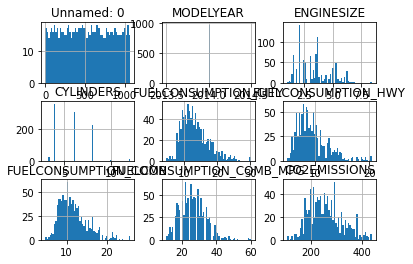

In [16]:
numFuelConDF = newFuelConDF.drop(columns = ['MODEL', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION', 'MAKE'])
numFuelConDF.hist(bins = 60)

First we delete categorical values from with drop method and then we use hist method to show histogram of numerical columns.
One by one column histograms are like below (better view)  :

<AxesSubplot:>

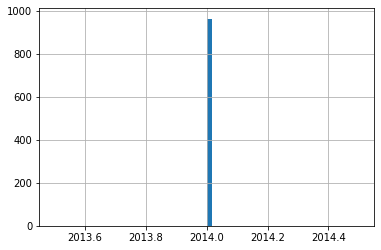

In [17]:
numFuelConDF['MODELYEAR'].hist(bins = 60)

<AxesSubplot:>

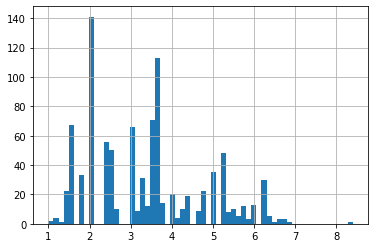

In [18]:
numFuelConDF['ENGINESIZE'].hist(bins = 60)

<AxesSubplot:>

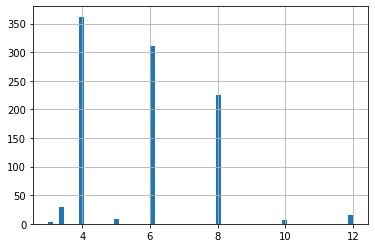

In [19]:
numFuelConDF['CYLINDERS'].hist(bins = 60)

<AxesSubplot:>

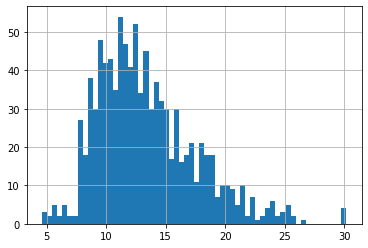

In [20]:
numFuelConDF['FUELCONSUMPTION_CITY'].hist(bins = 60)

<AxesSubplot:>

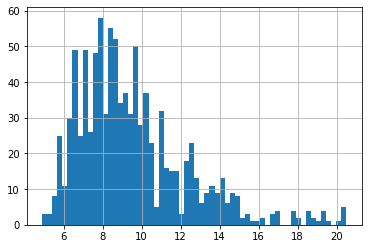

In [21]:
numFuelConDF['FUELCONSUMPTION_HWY'].hist(bins = 60)

<AxesSubplot:>

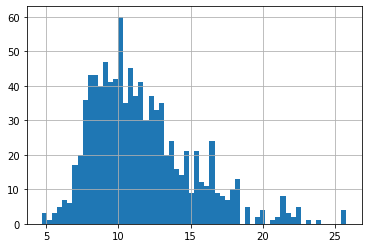

In [22]:
numFuelConDF['FUELCONSUMPTION_COMB'].hist(bins = 60)

<AxesSubplot:>

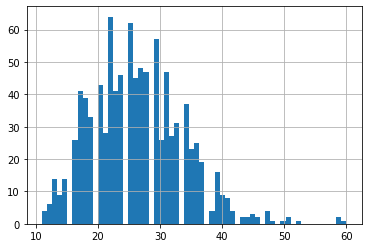

In [23]:
numFuelConDF['FUELCONSUMPTION_COMB_MPG'].hist(bins = 60)

<AxesSubplot:>

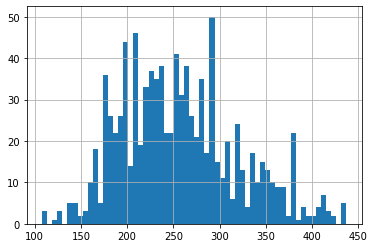

In [24]:
numFuelConDF['CO2EMISSIONS'].hist(bins = 60)

# Part 7:

In [25]:
numFuelConDF['MODELYEAR'] = 0
numFuelConDF['ENGINESIZE'] = (numFuelConDF['ENGINESIZE'] - numFuelConDF['ENGINESIZE'].mean()) / numFuelConDF['ENGINESIZE'].std()
numFuelConDF['CYLINDERS'] = (numFuelConDF['CYLINDERS'] - numFuelConDF['CYLINDERS'].mean()) / numFuelConDF['CYLINDERS'].std()
numFuelConDF['FUELCONSUMPTION_CITY'] = (numFuelConDF['FUELCONSUMPTION_CITY'] - numFuelConDF['FUELCONSUMPTION_CITY'].mean()) / numFuelConDF['FUELCONSUMPTION_CITY'].std()
numFuelConDF['FUELCONSUMPTION_HWY'] = (numFuelConDF['FUELCONSUMPTION_HWY'] - numFuelConDF['FUELCONSUMPTION_HWY'].mean()) / numFuelConDF['FUELCONSUMPTION_HWY'].std()
numFuelConDF['FUELCONSUMPTION_COMB'] = (numFuelConDF['FUELCONSUMPTION_COMB'] - numFuelConDF['FUELCONSUMPTION_COMB'].mean()) / numFuelConDF['FUELCONSUMPTION_COMB'].std()
numFuelConDF['FUELCONSUMPTION_COMB_MPG'] = (numFuelConDF['FUELCONSUMPTION_COMB_MPG'] - numFuelConDF['FUELCONSUMPTION_COMB_MPG'].mean()) / numFuelConDF['FUELCONSUMPTION_COMB_MPG'].std()
numFuelConDF['CO2EMISSIONS'] = (numFuelConDF['CO2EMISSIONS'] - numFuelConDF['CO2EMISSIONS'].mean()) / numFuelConDF['CO2EMISSIONS'].std()
print(numFuelConDF)

      Unnamed: 0  MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0              0          0   -0.973622  -0.952861             -0.833605   
1              1          0   -0.683744  -0.952861             -0.519842   
2              2          0   -1.335970  -0.952861             -1.774893   
4              4          0    0.113422   0.139541             -0.302621   
5              5          0    0.113422   0.139541             -0.350893   
...          ...        ...         ...        ...                   ...   
1062        1062          0   -0.248926   0.139541              0.011141   
1063        1063          0   -0.103987   0.139541             -0.037130   
1064        1064          0   -0.248926   0.139541              0.011141   
1065        1065          0   -0.103987   0.139541             -0.109537   
1066        1066          0   -0.103987   0.139541              0.373175   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0         

For each column of our data frame we caluculate mean and standard deviation and then normalize values using given formula and save it in columns..

# Part 8:

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

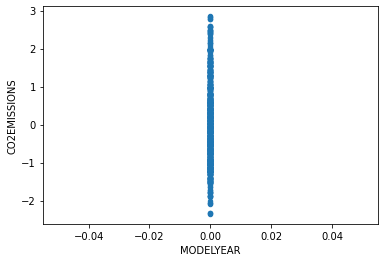

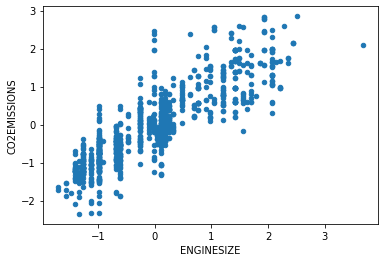

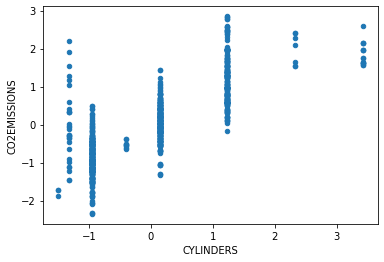

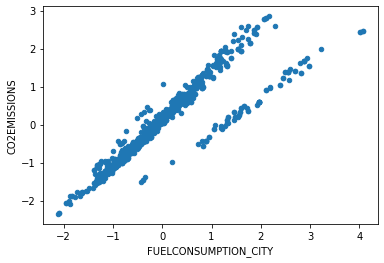

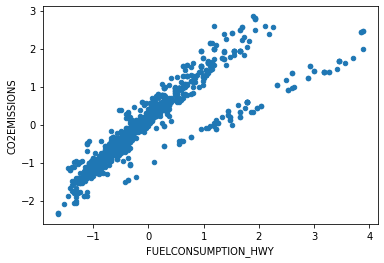

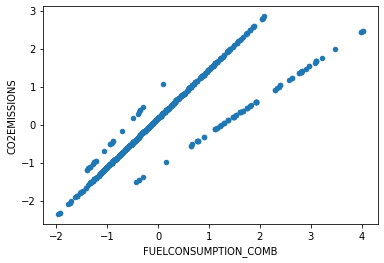

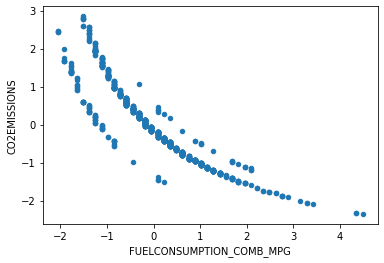

In [26]:
numFuelConDF.plot.scatter(x='MODELYEAR', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='CYLINDERS', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')
numFuelConDF.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')

Here we show the relation between each car properties and co2 emission and draw a plot for it to find out which one has better relation with co2 emission (probablly one with obvious linear relation)

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

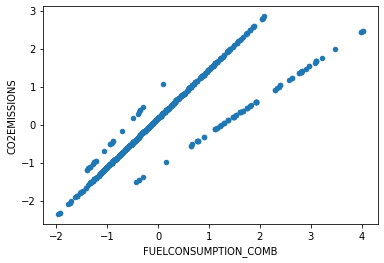

In [27]:
numFuelConDF.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')

As we can see the relation between co2 emission and fuel consumption_comb is almost linear and looks like a straght line.

# Part 9:

In [28]:
hypothesisData = numFuelConDF[{'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'}]
hypothesisData

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.888216,-0.960111
1,-0.576247,-0.564949
2,-1.625596,-1.908498
4,-0.292640,-0.201401
5,-0.462804,-0.422691
...,...,...
1062,0.047690,0.225373
1063,-0.037393,0.114728
1064,0.047690,0.225373
1065,-0.094114,0.051502


Make a new data frame with FUELCONSUMPTION_COMB and CO2EMISSIONS

# Part 10:

In [29]:
onesX = [1] * len(hypothesisData)
xMat = numpy.array([onesX, list(hypothesisData['FUELCONSUMPTION_COMB'])]).T
yMat = hypothesisData[{'CO2EMISSIONS'}].to_numpy()
xTx = numpy.matmul(xMat.transpose(), xMat)
invxTx = numpy.linalg.inv(xTx)
xTy = numpy.matmul(xMat.transpose(), yMat)
theta = numpy.matmul(invxTx, xTy)
theta

array([[2.54251589e-16],
       [8.88687103e-01]])

Array theta contains theta1 and thata0.

In [30]:
xTehta = numpy.dot(xMat, theta)
error = xTehta - yMat
MSE = error**2/len(hypothesisData)
MSE.sum()

0.2100171470129475

As we can see mean squared error is about 0.21 and is less than 0.5 which is good here.

Using matrixes and linear regression we find the Hypothesis Function. The technique used here is from a youtube video. the link is : https://www.youtube.com/watch?v=Qa_FI92_qo8

# Part 11:

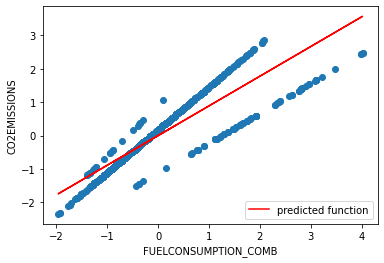

In [31]:
X = numpy.array(list(hypothesisData['FUELCONSUMPTION_COMB'])).T
hTheta = theta[1] * X + theta[0]
pyplt.scatter(X, yMat)
pyplt.plot(X, hTheta, color = 'red', label = 'predicted function')
pyplt.xlabel('FUELCONSUMPTION_COMB')
pyplt.ylabel('CO2EMISSIONS')
pyplt.legend(loc = "lower right")
pyplt.show()

Here we show plot and prediction line. the predicted function found previously (by using linear regression and matrix).
The red line predicts the function well cause it is close to data and grows as fuelConsumtion_comb rise.

# Part 12:

103
3        9.864427
20       8.886871
30       9.953296
42      11.730670
43       9.686689
          ...    
1022     8.353659
1027     8.709134
1051     9.508952
1052    10.308770
1053     9.508952
Name: FUELCONSUMPTION_COMB, Length: 103, dtype: float64


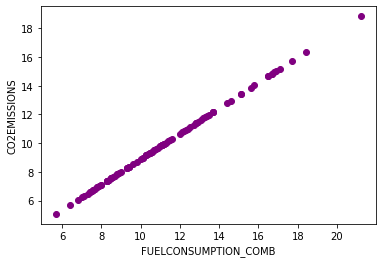

In [32]:
print(len(naFuelConDF))
resultCo2 = theta[1] * naFuelConDF['FUELCONSUMPTION_COMB'] + theta[0]
print(resultCo2)
pyplt.scatter(naFuelConDF['FUELCONSUMPTION_COMB'], resultCo2, color = 'purple')
pyplt.xlabel('FUELCONSUMPTION_COMB')
pyplt.ylabel('CO2EMISSIONS')
pyplt.show()

Finally we get cars fuel consumption of those which have missing values for co2 emission to predicted and give it to our prediction funcion to predict co2 emission. 